In [1]:
import pytesseract
from pytesseract import Output
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [112]:
def grayscale_plot(filepath):
    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    #print("1:::",WIDTH,HEIGHT,":::1")
    pix = img.load()
    #print("1:::",pix,":::1")
    data = np.asarray(img.getdata())
    #print("1:::",data,":::1")
    data = data.reshape((HEIGHT,WIDTH))
    #print("1:::",data,":::1")
    fig,ax = plt.subplots()
    reduced_data = data.mean(axis=0)
    #print("1:::",reduced_data,":::1")
    ax.plot(reduced_data)
    plt.show()
    plt.imshow(img)
    return reduced_data,WIDTH,HEIGHT

def c_sep_size1(reduced_data,WIDTH):
    p=[]
    c_sep=[]
    c_sep1=[]
    c_sep_size=[]
    for i in range(11,len(reduced_data)-10):
        if(reduced_data[i-3]==255. and reduced_data[i+3]==255.):
            p.append(i)
    for a in range(len(p)-1):
        if(p[a+1]-p[a]>30):
            c_sep.append(p[a])
    c_sep.append(p[-1])

    for i in range(0,len(c_sep)-1):
        if(c_sep[i+1]-c_sep[i]!=1):
            c_sep1.append(c_sep[i])
    c_sep1.append(c_sep[-1])
    c_sep1.append(WIDTH)
    c_sep_size.append(c_sep1[0])
    for i in range(len(c_sep1)-1):
        c_sep_size.append(c_sep1[i+1]-c_sep1[i])
    #c_sep_size.append(c_sep[-1]-c_sep1[-1])
    return c_sep,c_sep1,c_sep_size

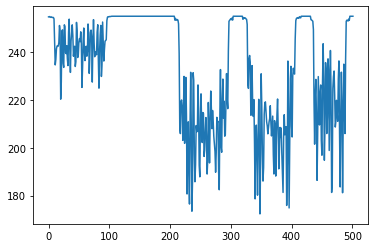

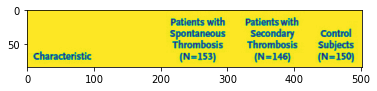

In [114]:
filepath="a1.jpg"
rd,w,h=grayscale_plot(filepath)

In [115]:
c_sep,c_sep1,c_sep_size =c_sep_size1(rd,w)

In [116]:
print(c_sep,c_sep1,c_sep_size)

[204, 316, 428] [204, 316, 428, 502] [204, 112, 112, 74]


In [117]:
img = cv2.imread(filepath)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
bbox_list =[]
bboxtxt_list=[]
x_max=[]
y_max=[]
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        x_max.append(d['left'][i]+d['width'][i])
        y_max.append(d['top'][i]+d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        bbox = (x, y, w, h)
        bbox_list.append(bbox)
        bboxtxt_list.append(d['text'][i])
        print(d['text'][i])
print(bbox_list)
print(x_max)
print(y_max)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Patients
with
Patients
with
Spontaneous
Secondary
—Control
Thrombosis
Thrombosis
Subjects
Characteristic
(N=153)
(N=146)
—
(N=150)
[(216, 12, 50, 11), (270, 11, 26, 12), (328, 12, 49, 11), (380, 11, 27, 12), (215, 30, 82, 14), (335, 28, 66, 16), (440, 28, 46, 12), (218, 45, 75, 12), (330, 45, 75, 12), (437, 45, 52, 16), (1, 55, 95, 29), (229, 55, 54, 29), (341, 64, 54, 14), (404, 55, 25, 29), (437, 63, 53, 15)]
[266, 296, 377, 407, 297, 401, 486, 293, 405, 489, 96, 283, 395, 429, 490]
[23, 23, 23, 23, 44, 44, 40, 57, 57, 61, 84, 84, 78, 84, 78]


In [118]:
left=[]
top=[]
width=[]
height=[]
total_ln=[]
jkl=[]
lpk=[]
for i in range(len(bbox_list)):
        left.append(bbox_list[i][0])
        top.append(bbox_list[i][1])
        width.append(bbox_list[i][2])
        height.append(bbox_list[i][3])
for i in range(len(left)-1):
    jkl.append(left[i+1]-x_max[i])
    #lpk.append()
jkl.insert(0,0)
print(x_max)
print(left)
print(jkl)
print(bboxtxt_list)
res = {i:[jkl[i],bboxtxt_list[i]] for i in range(len(left))}

[266, 296, 377, 407, 297, 401, 486, 293, 405, 489, 96, 283, 395, 429, 490]
[216, 270, 328, 380, 215, 335, 440, 218, 330, 437, 1, 229, 341, 404, 437]
[0, 4, 32, 3, -192, 38, 39, -268, 37, 32, -488, 133, 58, 9, 8]
['Patients', 'with', 'Patients', 'with', 'Spontaneous', 'Secondary', '—Control', 'Thrombosis', 'Thrombosis', 'Subjects', 'Characteristic', '(N=153)', '(N=146)', '—', '(N=150)']


In [119]:
lss=[]
res1 = {i:[left[i],x_max[i], abs(left[i+1]-x_max[i]),bboxtxt_list[i]] for i in range(len(left)-1)}
#res1.append(bboxtxt_list[-1])
od = {k: v for k, v in sorted(res1.items(), key=lambda item: item[1][1])}
for j in od.values():
    lss.append(j)
    
res2 = {i:lss[i] for i in range(len(lss))}

In [120]:
res2

{0: [1, 96, 133, 'Characteristic'],
 1: [216, 266, 4, 'Patients'],
 2: [229, 283, 58, '(N=153)'],
 3: [218, 293, 37, 'Thrombosis'],
 4: [270, 296, 32, 'with'],
 5: [215, 297, 38, 'Spontaneous'],
 6: [328, 377, 3, 'Patients'],
 7: [341, 395, 9, '(N=146)'],
 8: [335, 401, 39, 'Secondary'],
 9: [330, 405, 32, 'Thrombosis'],
 10: [380, 407, 192, 'with'],
 11: [404, 429, 8, '—'],
 12: [440, 486, 268, '—Control'],
 13: [437, 489, 488, 'Subjects']}

In [121]:
c_sep

[204, 316, 428]

In [122]:
final_op={}
q=0
m=[]
x=0
for j in range(len(c_sep)):
    for i in res2.values():
        if(i[1]<c_sep[j] and i[1]>x):
            m.append(i[3])
    x=c_sep[j]
    final_op[q]=m
    m=[]
    q+=1
        
final_op

{0: ['Characteristic'],
 1: ['Patients', '(N=153)', 'Thrombosis', 'with', 'Spontaneous'],
 2: ['Patients', '(N=146)', 'Secondary', 'Thrombosis', 'with']}

In [106]:
a=[]
w=[]
for i in final_op.values():
    a.append(i)
for i in range(len(a)-1):
             #w.append(list(a[i+1]-a[i]))
             bool_list = list(map(lambda x, y: 0 if(x == y):, a[i+1],a[i]))
             print(bool_list)
             # lambda x : True if (x > 10 and x < 20) else False
    
    

SyntaxError: invalid syntax (<ipython-input-106-09e52618937e>, line 7)